## <a id='toc1_1_'></a>[Two factor Bergomi Model](#toc0_)

This projects aims at presenting this two factor model and a Monte Carlo procedure to price options and VIX derivatives.

**Table of contents**<a id='toc0_'></a>    
- [Two factor Bergomi Model](#toc1_1_)    
    - [The one factor model](#toc1_1_1_)    
      - [Power-law kernel (rough volatility)](#toc1_1_1_1_)    
      - [Exponential kernel](#toc1_1_1_2_)    
    - [The two factor exponential model](#toc1_1_2_)    
    - [Implementation](#toc1_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[The one factor model](#toc0_)

The two factor Bergomi model relays on forward instantaneous variance quantity. Let's define this quantity by $\xi_t^u = \mathbb{E}(\sigma_u^2 \, | \, \mathcal{F}_t)$ for $t\leq u$, where $\sigma_u^2$ is the instantaneous variance à time $u$.<br>
In the Heston Model, we have : $d(\sigma_t^2) = dV_t = \kappa(\theta - V_t)dt + \omega \sqrt{V_t} dW_t^V$. Hence, we can compute $\xi_t^u$ in this model:
\begin{align*}
    &d(e^{\kappa t}V_t) = \kappa e^{\kappa t} V_t dt + e^{\kappa t} dV_t\\
    \implies &V_u = \theta + e^{-\kappa (u-t)}(V_t - \theta) + \omega \int_t^u e^{\kappa s}\sqrt{V_s}dW_s^V\\
    \implies &\xi_t^u = \theta + e^{-\kappa (u-t)}(V_t - \theta)\\
    \implies &d\xi_t^u = \omega e^{-\kappa (u-t)}\sqrt{V_t}dW_t^V = \omega e^{-\kappa (u-t)}\sqrt{\xi_t^t }dW_t^V
\end{align*}

In the one factor model, we modelize $\xi$ by:
$$
    \dfrac{d\xi_t^u}{\xi_t^u} = K(t,u)dW_t, \, t\leq u
$$
where $K \, : \mathbb{R}_+ \to \mathbb{R}_+$ is a Kernel, chosen homogeneous in time, i.e. $K(t,u) = K(u - t)$. So $\xi$ is modelized by:
\begin{align*}
    &\xi_t^u = \xi_0^u\exp\left( \int_0^t K(u-s) dW_s - \dfrac{1}{2}\int_0^t K(u-s)^2 ds \right)\\
    \implies &\sigma_u^2 = \xi_u^u = \xi_0^u \exp\left( \int_0^u K(u-s) dW_s - \dfrac{1}{2}\int_0^u K(u-s)^2 ds \right)
\end{align*}
Finally, we can write the variance of Variance Swap denoted by $\sigma_T^2(t)$ (historical variance between $t$ and $T$) in term of $\xi$:
$$
    \sigma_T^2(t)=\mathbb{E}\left( \dfrac{1}{T-t} \int_t^T \sigma_u^2 du \, | \, \mathcal{F}_t \right)= \dfrac{1}{T-t}\int_t^T \xi_t^u du.
$$
Below the main kernel to work with.

#### <a id='toc1_1_1_1_'></a>[Power-law kernel (rough volatility)](#toc0_)
Here, $K(t,T)=\nu (T-t)^{H-1/2}$ where $H$ is the Hurst exponent, $H\in (0, \, 1/2)$.<br>
The problem here is that we does not obtain a Markovian representation of $\xi$. Besides, we do not obtain a martingale (blowing up behaviour for short maturities). Thus, we prefere to use Time Shifted Power Law : $K(t,T) = \nu (T-t + \delta)^{H-1/2}$.

#### <a id='toc1_1_1_2_'></a>[Exponential kernel](#toc0_)
We take $K(t,T)=\omega e^{-\kappa T}, \, \omega \geq 0 \, , \kappa > 0$. Then:
$$
     \xi_t^u = \xi_0^u \exp\left( \omega e^{-\kappa(u-t)}X_t - \dfrac{\omega^2}{2}e^{-2\kappa (u-t)}Var(X_t) \right)
$$
where:
\begin{align*}
     &Var(X_t) = \dfrac{1 - e^{-2\kappa t}}{2\kappa}\\
     &X_t = \int_0^t e^{-\kappa (t-s)}dW_s\\
     \implies &dX_t = -\kappa X_tdt + dW_t, \, X_0 = 0.
\end{align*}
Hence $X$ is a Ornstein-Uhlenbeck process.

### <a id='toc1_1_2_'></a>[The two factor exponential model](#toc0_)

Let $\theta \in [0,1], \, \omega \geq 0, \, k_1 > k_2 > 0$. The Kernel is $K(t,T) = K(T-t) = \omega[(1-\theta)e^{-k_1 (T-t)} + \theta e^{-k_2(T-t)}]$. Then:
\begin{align*}
    &\dfrac{d\xi_t^u}{\xi_t^u} = \omega\alpha\left[ (1-\theta)e^{-k_1(u-t)}dW_t^1 + \theta e^{-k_2(u-t)}dW_t^2 \right]\\
    &d \langle W^1, W^2 \rangle_t = \rho_{12}dt
\end{align*}
So we obtain using Ito's formula on $\log \xi_t^u$:
\begin{align*}
    &\xi_t^u = \xi_0^u \exp \left( \omega\alpha[(1-\theta) e^{-k_1(u-t)}X_t^1 + \theta e^{-k_2(u-t)}X_t^2] - \dfrac{\omega^2}{2} \chi (t,u)\right)\\
    &\chi(t,u) = \alpha^2 [(1-\theta)^2 e^{-2k_1(u-t)}Var(X_t^1) + \theta^2e^{-2k_2(u-t)}Var(X_t^2) + 2\theta(1-\theta)e^{-(k_1+k_2)(u-t)}Cov(X_t^1,X_t^2)]\\
    &\alpha = [(1-\theta)^2 + \theta^2 + 2\rho_{12}\theta(1-\theta)]^{-1/2}\\
    &dX_t^i= -k_iX_t^idt + dW_t^i\\
    &Var(X_t^i) = \dfrac{1 - e^{-2k_it}}{2k_i}\\
    &Cov(X_t^1, X_t^2) = \rho_{12}\dfrac{1 - e^{-(k_1+k_2)t}}{k_1+k_2}
\end{align*}
where $\alpha$ is a scale factor so that $\omega$ is the instantaneous variance of $\xi_t^t = V_t$.<br>
Now, the spot can be modelized by (by ometting risk-free rate and with no dividen payment):
\begin{align*}
    &\dfrac{dS_t}{S_t} = \sqrt{\xi_t^t}dW_t^S\\
    \implies &S_t = S_0 \exp\left( \int_0^t \sqrt{\xi_s^s}dW_s - \dfrac{1}{2}\int_0^t \xi_s^s ds \right)\\
    &d \langle W^S, W^1\rangle_t = \rho_{S1}dt\\
    &d \langle W^S, W^2\rangle_t = \rho_{S2}dt
\end{align*}

We take a discrete time grid with step size $\Delta t_i = t_i - t_{i-1}$. Knowing $X_{t_{i-1}}^j, S_{t_{i-1}}$, we have:
$$
  \mathbb{E}(X_{t_i}^j \, | \, X_{t_{i-1}}^j) = e^{-k_j\Delta t_i}X^j_{t_{i-1}}\\
  Var(X_{t_i}^j\, | \, X_{t_{i-1}}^j) = \int_{t_{i-1}}^{t_i}e^{-2k_j(t_i-s)}ds= \dfrac{1 - e^{-2k_j\Delta t_i}}{2k_j} = \sigma^2_{jj}\\
  Cov(X_{t_i}^1, X_{t_i}^2 | X_{t_{i-1}}^1, X_{t_{i-1}}^2) = \rho_{12}\int_{t_{i-1}}^{t_i}e^{-(k_1 + k_2)(t_i-s)}ds = \rho_{12}\dfrac{1 - e^{-(k_1+k_2)\Delta t_i}}{k_1+k_2} = \sigma^2_{12}\\
  Cov(X_{t_i}^j, logS_{t_i} \, | \, X_{t_{i-1}}^j, S_{t_{i-1}}) = \rho_{Sj} \sqrt{\xi_{t_{i-1}}^{t_{i-1}}}\int_{t_{i-1}}^{t_i}e^{-k_j(t_i - s)}ds = \rho_{Sj} \sqrt{\xi_{t_{i-1}}^{t_{i-1}}} \dfrac{1 - e^{-k_j\Delta t_i}}{k_j} = \sqrt{\xi_{t_{i-1}}^{t_{i-1}}}\sigma^2_{Sj}\\
  Var(logS_{t_i}\, | \, S_{t_{i-1}}) = \xi_{t_{i-1}}^{t_{i-1}} \Delta t_i = \xi_{t_{i-1}}^{t_{i-1}}\sigma^2_{SS}\\
  \mathbb{E}(logS_{t_i}\, | \, S_{t_{i-1}}) = logS_{t_{i-1}} - \frac{1}{2}\xi_{t_{i-1}}^{t_{i-1}}\Delta t_i
$$
We write:
$$
  \Sigma = \begin{pmatrix}
      \sigma_{11}^2 & \sigma_{12}^2 & \sigma_{S1}^2 \\
      \sigma_{12}^2 & \sigma_{22}^2 & \sigma_{S2}^2 \\
      \sigma_{S1}^2 & \sigma_{S2}^2 & \sigma_{SS}^2
  \end{pmatrix}
$$
The covariance matrix for log spot and both Ornstein-Uhlenbeck. Ussing Cholesky algorithm, we can find $\alpha$ such that $\Sigma = \alpha \alpha^*$. We will use $\alpha$ to correlate standard gaussian random variables.

### <a id='toc1_1_3_'></a>[Implementation](#toc0_)

To compute implied volatility from option prices, we will use P. Jäckel method from py_vollib.

In [1]:
import numpy as np

from scipy.stats import norm
from scipy.linalg import cholesky
from numpy.polynomial.hermite import hermgauss
import matplotlib.pyplot as plt


from math import exp, sqrt, log, pi, sin, cos, atan, tan
from py_vollib.black_scholes.implied_volatility import implied_volatility

vec_find_vol_rat = np.vectorize(implied_volatility)
plt.rcParams["figure.figsize"] = (4.8, 3.2)

In [2]:
def two_factor_bergomi_mc(vov, k_1, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, S_0, T, n_steps, N_sims):
    t_grid = np.linspace(0., T, n_steps + 1)
    dt = T/n_steps

    def covar(k_1,k_2,rho,t):
        return rho*(1-np.exp(-(k_1+k_2)*t))/(k_1+k_2)

    def chi_func(k_1,k_2,theta,rho_x1x2,alpha,t): # computes chi(t,t)
        chi = (1-theta)**2*covar(k_1,k_1,1.0,t)+theta**2*covar(k_2,k_2,1.0,t)+\
        2*theta*(1-theta)*covar(k_1,k_2,rho_x1x2,t)

        return alpha**2*chi

    alpha = 1/sqrt((1-theta)**2+theta**2+2*rho_x1x2*theta*(1-theta))
    chi = chi_func(k_1,k_2,theta,rho_x1x2,alpha,t_grid)

    X_1 = np.zeros((n_steps+1,N_sims))
    X_2 = np.zeros((n_steps+1,N_sims))
    X = np.zeros((n_steps+1,N_sims))
    inst_vol = np.zeros((n_steps+1,N_sims))
    logS = np.zeros((n_steps+1,N_sims))
    logS[0] = log(S_0)
    inst_vol[0] = sqrt(xi_0)

    # Variance and covariance that can be computed now
    s_11, s_22, s_12 = covar(k_1,k_1,1,dt), covar(k_2,k_2,1,dt), covar(k_1,k_2,rho_x1x2,dt)
    s_s1 = covar(k_1,0,rho_sx1,dt)
    s_s2 = covar(k_2,0,rho_sx2,dt)
    s_ss = dt

    # Covariance square root lower triangular matrix
    corr_mat = np.array([[s_11, s_12, s_s1], [s_12, s_22, s_s2], [s_s1, s_s2, s_ss]])
    sqr_root = cholesky(corr_mat, lower=True)

    for i in range(n_steps):
        z1, z2, z3 = np.random.normal(size=(3,N_sims))

        # Compute next step for all processes (X^1, X^2, xi, logS)
        X_1[i+1] = X_1[i]*np.exp(-k_1*dt) + sqr_root[0][0] * z1
        X_2[i+1] = X_2[i]*np.exp(-k_2*dt) + (sqr_root[1][0] * z1 + sqr_root[1][1] * z2)
        X[i+1] = alpha*((1-theta)*X_1[i+1] + theta*X_2[i+1])
        inst_vol[i+1] = sqrt(xi_0)*np.exp(vov*X[i+1]/2-vov**2/4*chi[i+1])
        logS[i+1] = logS[i] - 0.5*inst_vol[i]**2*dt + inst_vol[i] * (sqr_root[2][0] * z1 + sqr_root[2][1] * z2 + sqr_root[2][2] * z3)

    return np.exp(logS[-1])

In [3]:
vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1, rho_sx2, rho_x1x2 = -0.8, -0.7, 0.7
mat = 1

spot_0 = 100
n_steps = 500
N_sims = 100000

In [6]:
ST = two_factor_bergomi_mc(vov, k_1, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)

In [7]:
log_moneyness = np.linspace(-0.6,0.4,100)
strike_array = np.exp(log_moneyness)*spot_0

In [8]:
opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')

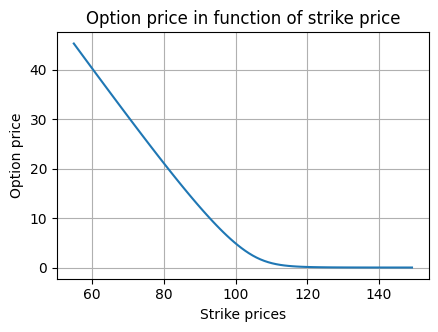

In [12]:
plt.plot(strike_array, opt_price)
plt.xlabel('Strike prices')
plt.ylabel('Option price')
plt.title('Option price in function of strike price')
plt.grid()

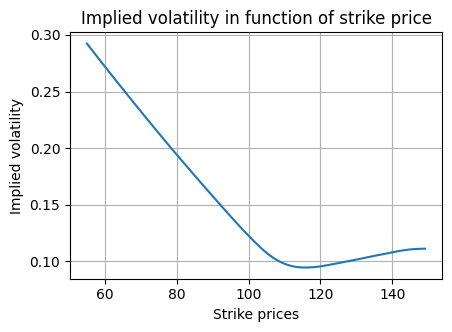

In [19]:
plt.plot(strike_array, iv)
plt.xlabel('Strike prices')
plt.ylabel('Implied volatility')
plt.title('Implied volatility in function of strike price')
plt.grid()

Let's see impact of vol of vol and the two mean reverting speed.

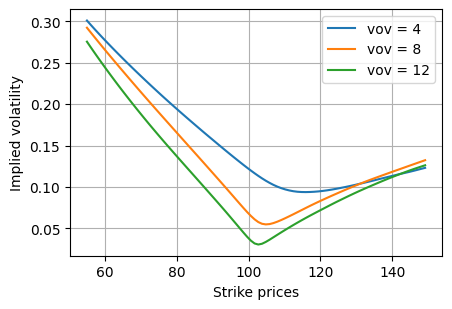

In [24]:
vov = [4,8,12]
for v in vov:
    ST = two_factor_bergomi_mc(v, k_1, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)
    opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
    iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')
    plt.plot(strike_array, iv, label='vov = {}'.format(v))
plt.xlabel('Strike prices')
plt.ylabel('Implied volatility')
plt.legend()
plt.grid()

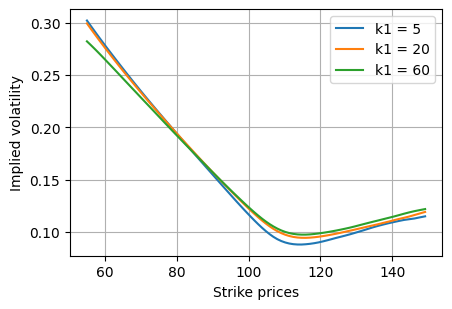

In [28]:
vov = 4
k_1_arr = [5, 20, 60]
for k in k_1_arr:
    ST = two_factor_bergomi_mc(vov, k, k_2, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)
    opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
    iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')
    plt.plot(strike_array, iv, label='k1 = {}'.format(k))
plt.xlabel('Strike prices')
plt.ylabel('Implied volatility')
plt.legend()
plt.grid()

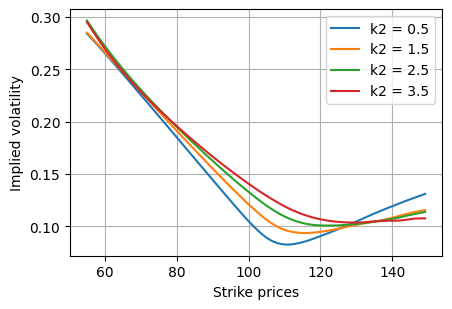

In [27]:
k_2_arr = [0.5, 1.5, 2.5, 3.5]
for k in k_2_arr:
    ST = two_factor_bergomi_mc(vov, k_1, k, theta, rho_sx1, rho_sx2, rho_x1x2, xi_0, spot_0, mat, n_steps, N_sims)
    opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
    iv = vec_find_vol_rat(opt_price, spot_0, strike_array, mat, 0, 'c')
    plt.plot(strike_array, iv, label='k2 = {}'.format(k))
plt.xlabel('Strike prices')
plt.ylabel('Implied volatility')
plt.legend()
plt.grid()

More vov seems to produce more pronounced smiles. High mean reversion speed $k_1$ seems to have some slight effects whereas low mean reversion speed $k_2$ makes more pronounced smiles fore small values of $k_2$.